In [1]:
import pandas as pd
import pickle
import datetime as dt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [2]:
#from LogIn import LogIn
#kite = LogIn().return_kite_obj()

In [3]:
budget_df = pd.read_csv('budget_new.csv')

In [4]:
budget_df = budget_df[budget_df['instrument']!='NSE:MRF']

In [5]:
budget_df['return'] = 0.05

In [6]:
budget_df['budget'] = 25000

In [7]:
budget_df

,instrument,budget,return
0,NSE:ACCELYA,25000,0.05
1,NSE:GOLDBEES,25000,0.05
2,NSE:GOLDSHARE,25000,0.05
3,NSE:NIFTYBEES,25000,0.05
4,NSE:POWERGRID,25000,0.05
5,NSE:WIPRO,25000,0.05
6,NSE:BIOCON,25000,0.05
7,NSE:COLPAL,25000,0.05
8,NSE:WABCOINDIA,25000,0.05
9,NSE:ASIANPAINT,25000,0.05


# Inputs

In [8]:
begin = "2015-02-01"
end = "2020-05-31"

In [9]:
leverage = 15
exit_time = dt.time(15, 10)

# Process

In [10]:
import datetime

# borrowed from https://stackoverflow.com/a/13565185
# as noted there, the calendar module has a function of its own
def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)  # this will never fail
    return next_month - datetime.timedelta(days=next_month.day)

def monthlist(begin,end):
    begin = datetime.datetime.strptime(begin, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")

    result = []
    while True:
        if begin.month == 12:
            next_month = begin.replace(year=begin.year+1,month=1, day=1)
        else:
            next_month = begin.replace(month=begin.month+1, day=1)
        if next_month > end:
            break
        result.append ([begin.strftime("%Y-%m-%d"),last_day_of_month(begin).strftime("%Y-%m-%d")])
        begin = next_month
    result.append ([begin.strftime("%Y-%m-%d"),end.strftime("%Y-%m-%d")])
    return result


date_list = monthlist(begin,end)

In [11]:
def get_clean_data(instrument):
    
    print(instrument)

    all_data_df = pd.DataFrame()

    for time_range in date_list:
        print(time_range)

        from_date = time_range[0]
        to_date = time_range[1]

        data_df = pd.read_pickle('./data_new/{}_{}_{}.pkl'.format(instrument, from_date, to_date))

        data_df.rename(columns={'date':'timestamp'}, inplace=True)
        data_df['date'] = data_df['timestamp'].dt.date
        data_df['day'] = data_df['timestamp'].dt.day_name()
        print(len(data_df))

        sanity_check = data_df.groupby('date').count().reset_index()
        incomplete_data_days = sanity_check[sanity_check['volume']<300]
        print(len(incomplete_data_days))

        data_df = data_df[~data_df['date'].isin(incomplete_data_days.date.tolist())]
        data_df['instrument'] = instrument
        print(len(data_df)/375)

        all_data_df = all_data_df.append(data_df, ignore_index=True)

    return all_data_df

In [12]:
header_list = ['instrument', 'high_prev', 'low_prev', 'open_today', 'condition', 'transaction_type', 'trade_number', 'level', 'budget', 'return', 'daily_khwab', 'actual_khwab', 'quantity', 'budget_required', 'price', 'trigger_price', 'squareoff', 'stoploss', 'order_id', 'timestamp', 'order_type', 'status', 'profit', 'pl_tag', 'flag', 'adhoora_khwab']


In [13]:
calculate = True

if calculate:
    
    all_trades = pd.DataFrame(columns=header_list)

    for instrument in budget_df.instrument.tolist():

        try:
            all_data_df = get_clean_data(instrument)

            for i in range(len(all_data_df.date.unique().tolist())-1):

                date_prev = all_data_df.date.unique().tolist()[i]
                data_prev = all_data_df[all_data_df['date']==date_prev]
                open_prev = data_prev.open.iloc[0]
                close_prev = data_prev.open.iloc[-1]
                high_prev = data_prev.high.max()
                low_prev = data_prev.low.min()

                date_today = all_data_df.date.unique().tolist()[i+1]
                data_today = all_data_df[all_data_df['date']==date_today]

                # Trim beyond exit time
                data_today = data_today[data_today['timestamp'].dt.time<exit_time]
                open_today = data_today.open.iloc[0]

                if (open_today > high_prev) & (open_today < 1.15 * high_prev):

                    condition = 'high'
                    transaction_type = 'buy'

                elif (open_today < low_prev) & (open_today > 0.85 * low_prev):

                    condition = 'low'
                    transaction_type = 'sell'

                else:

                    condition = None
                    transaction_type = None

                if condition is not None:

                    valid_trades = all_trades[(all_trades['instrument']==instrument) & (all_trades['condition']==condition) & (all_trades['status']=='complete')]
                    last_valid_trade = valid_trades[valid_trades['trade_number']==valid_trades['trade_number'].max()]

                    # Calculate trade number
                    if len(last_valid_trade):
                        trade_number = int(last_valid_trade['trade_number']) + 1
                    else:
                        trade_number = 1
                    
                    # Calculate level
                    if len(last_valid_trade):
                        if float(last_valid_trade['pl_tag'])==1.0:
                            level = 1
                        else:
                            level = float(last_valid_trade['level']) + 1
                    else:
                        level = 1

                    # Calculate budget and return
                    if level==1:
                        budget = float(budget_df[budget_df['instrument']==instrument]['budget'])
                        return_ = float(budget_df[budget_df['instrument']==instrument]['return'])
                    else:
                        budget = float(last_valid_trade['budget'])
                        return_ = float(last_valid_trade['return'])

                    # Calculate daily khwab
                    if len(last_valid_trade):
                        if int(last_valid_trade['pl_tag'])==1:
                            daily_khwab = round(return_ * budget, 2)
                        else:
                            daily_khwab = 0
                    else:
                        daily_khwab = round(return_ * budget, 2)

                    # Calculate actual khwab
                    if len(last_valid_trade):
                        actual_khwab = max(round(float(last_valid_trade['adhoora_khwab']) + daily_khwab, 2), round(return_ * budget, 2))
                    else:
                        actual_khwab = round(return_ * budget, 2)

                    # Caluclate tax
                    if actual_khwab > 5 * (round(return_ * budget, 2)):
                        factor = 1.5
                    else:
                        factor = 3
                        
                    tax = factor * (0.0005647 * actual_khwab)/return_
                    actual_khwab = round(actual_khwab + tax, 2)
                    
                    # Calculate quantity
                    quantity = int(round(actual_khwab/(return_ * open_today)))

                    # Calculate budget required
                    budget_required = round(quantity * open_today, 2)

                    # Calculate price and trigger price
                    if transaction_type=='buy':
                        price = round(open_today + 0.05 * max(round(20 * 0.0010 * open_today), 2), 2)
                        trigger_price = round(open_today + 0.05 * max(round(20 * 0.0005 * open_today),1), 2)
                    else:
                        price = round(open_today - 0.05 * max(round(20 * 0.0010 * open_today), 2), 2)
                        trigger_price = round(open_today - 0.05 * max(round(20 * 0.0005 * open_today),1), 2)

                    # Calculate square off and stoploss
                    squareoff = round(return_ * price, 1)
                    stoploss = round(return_ * price, 1)

                    # Calculate order_id, order_type
                    order_id = trade_number
                    order_type = 'SL'

                    # Calculate timestamp, status and profit
                    if transaction_type=='buy':
                        
                        if data_today.high.max() < trigger_price:

                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['high'] > price + squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['low'] < price - stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((row['close']-price) * quantity, 2)

                    else:

                        if data_today.low.min() > trigger_price:
                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0        

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['low'] < price - squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['high'] > price + stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((price - row['close']) * quantity, 2)

                    # Calculate P/L tag
                    pl_tag = round(round(float(profit), 2) / (float(squareoff) * float(quantity)), 1)

                    # Calculate flag
                    if abs(float(pl_tag))==1:
                        flag = 1
                    else:
                        flag = 0

                    # Calculate adhoora khwab
                    adhoora_khwab = round(float(actual_khwab) - profit, 2)

                    trades_today = pd.DataFrame(data={'instrument':[instrument], 
                                                      'high_prev':[high_prev], 
                                                      'low_prev':[low_prev], 
                                                      'open_today':[open_today], 
                                                      'condition':[condition], 
                                                      'transaction_type':[transaction_type], 
                                                      'trade_number':[trade_number], 
                                                      'level':[level], 
                                                      'budget':[budget], 
                                                      'return':[return_], 
                                                      'daily_khwab':[daily_khwab], 
                                                      'actual_khwab':[actual_khwab], 
                                                      'quantity':[quantity], 
                                                      'budget_required':[budget_required], 
                                                      'price':[price], 
                                                      'trigger_price':[trigger_price], 
                                                      'squareoff':[squareoff], 
                                                      'stoploss':[stoploss], 
                                                      'order_id':[order_id], 
                                                      'timestamp':[timestamp], 
                                                      'order_type':[order_type], 
                                                      'status':[status], 
                                                      'profit':[profit], 
                                                      'pl_tag':[pl_tag], 
                                                      'flag':[flag], 
                                                      'adhoora_khwab':[adhoora_khwab]
                                                     })

                    all_trades = all_trades.append(trades_today, ignore_index = True)
        except Exception as ex:
            print('Failed calculation for {} : {}'.format(instrument, ex))
            
    all_trades.to_pickle('all_trades_brokerage_return_newdata_{}_{}.pkl'.format(begin, end))
    
else:
    
    all_trades = pd.read_pickle('all_trades_brokerage_return_newdata_{}_{}.pkl'.format(begin, end))

NSE:ACCELYA
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7109
0
18.957333333333334
['2015-05-01', '2015-05-31']
7494
0
19.984
['2015-06-01', '2015-06-30']
8233
0
21.954666666666668
['2015-07-01', '2015-07-31']
8568
0
22.848
['2015-08-01', '2015-08-31']
7831
0
20.882666666666665
['2015-09-01', '2015-09-30']
7442
0
19.845333333333333
['2015-10-01', '2015-10-31']
7435
0
19.826666666666668
['2015-11-01', '2015-11-30']
6752
1
17.84
['2015-12-01', '2015-12-31']
7949
1
20.504
['2016-01-01', '2016-01-31']
7017
0
18.712
['2016-02-01', '2016-02-29']
7606
1
19.576
['2016-03-01', '2016-03-31']
7203
1
18.44
['2016-04-01', '2016-04-30']
6574
0
17.530666666666665
['2016-05-01', '2016-05-31']
8196
0
21.856
['2016-06-01', '2016-06-30']
8105
0
21.613333333333333
['2016-07-01', '2016-07-31']
7397
0
19.72533333333333
['2016-08-01', '2016-08-31']
8017
0
21.378666666666668
['2016-09-01', '2016-09-30']
7459
0
19.890666666666668
['2016-10-01'

0
19.797333333333334
['2018-01-01', '2018-01-31']
8141
0
21.709333333333333
['2018-02-01', '2018-02-28']
6790
0
18.106666666666666
['2018-03-01', '2018-03-31']
6995
0
18.653333333333332
['2018-04-01', '2018-04-30']
7772
0
20.72533333333333
['2018-05-01', '2018-05-31']
8093
0
21.581333333333333
['2018-06-01', '2018-06-30']
7684
0
20.490666666666666
['2018-07-01', '2018-07-31']
8165
0
21.773333333333333
['2018-08-01', '2018-08-31']
7795
0
20.786666666666665
['2018-09-01', '2018-09-30']
6539
0
17.437333333333335
['2018-10-01', '2018-10-31']
7730
0
20.613333333333333
['2018-11-01', '2018-11-30']
7113
1
18.808
['2018-12-01', '2018-12-31']
5830
9
10.808
['2019-01-01', '2019-01-31']
4919
20
3.0
['2019-02-01', '2019-02-28']
3823
20
0.0
['2019-03-01', '2019-03-31']
3229
19
0.0
['2019-04-01', '2019-04-30']
2853
19
0.0
['2019-05-01', '2019-05-31']
3642
21
0.8826666666666667
['2019-06-01', '2019-06-30']
3948
19
0.0
['2019-07-01', '2019-07-31']
4291
23
0.0
['2019-08-01', '2019-08-31']
5198
19
0.821

0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05

['2017-04-01', '2017-04-30']
6739
0
17.970666666666666
['2017-05-01', '2017-05-31']
8224
0
21.930666666666667
['2017-06-01', '2017-06-30']
7841
0
20.909333333333333
['2017-07-01', '2017-07-31']
7655
1
19.933333333333334
['2017-08-01', '2017-08-31']
7824
0
20.864
['2017-09-01', '2017-09-30']
7853
0
20.941333333333333
['2017-10-01', '2017-10-31']
7154
1
18.92
['2017-11-01', '2017-11-30']
8235
0
21.96
['2017-12-01', '2017-12-31']
7442
0
19.845333333333333
['2018-01-01', '2018-01-31']
8237
0
21.965333333333334
['2018-02-01', '2018-02-28']
7115
0
18.973333333333333
['2018-03-01', '2018-03-31']
7087
0
18.898666666666667
['2018-04-01', '2018-04-30']
7845
0
20.92
['2018-05-01', '2018-05-31']
8201
0
21.869333333333334
['2018-06-01', '2018-06-30']
7848
0
20.928
['2018-07-01', '2018-07-31']
8224
0
21.930666666666667
['2018-08-01', '2018-08-31']
7836
0
20.896
['2018-09-01', '2018-09-30']
6726
0
17.936
['2018-10-01', '2018-10-31']
7839
0
20.904
['2018-11-01', '2018-11-30']
7134
1
18.864
['2018-12-0

22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-0

7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['20

8250
0
22.0
['2015-07-01', '2015-07-31']
8621
0
22.989333333333335
['2015-08-01', '2015-08-31']
7871
0
20.989333333333335
['2015-09-01', '2015-09-30']
7483
0
19.954666666666668
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8227
0
21.938666666666666
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8

1
18.981333333333332
['2019-11-01', '2019-11-30']
7497
0
19.992
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6750
0
18.0
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:BATAINDIA
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7121
0
18.989333333333335
['2015-05-01', '2015-05-31']
7500
0
20.0
['2015-06-01', '2015-06-30']
8250
0
22.0
['2015-07-01', '2015-07-31']
8621
0
22.989333333333335
['2015-08-01', '2015-08-31']
7871
0
20.989333333333335
['2015-09-01', '2015-09-30']
7483
0
19.954666666666668
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8232
0
21.952
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01',

['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6751
0
18.002666666666666
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:MCDOWELL-N
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7121
0
18.989333333333335
['2015-05-01', '2015-05-31']
7500
0
20.0
['2015-06-01', '2015-06-30']
8250
0
22.0
['2015-07-01', '2015-07-31']
8621
0
22.989333333333335
['2015-08-01', '2015-08-31']
7871
0
20.989333333333335
['2015-09-01', '2015-09-30']
7482
0
19.952
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8226
0
21.936
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875

['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6750
0
18.0
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:AMARAJABAT
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7121
0
18.989333333333335
['2015-05-01', '2015-05-31']
7500
0
20.0
['2015-06-01', '2015-06-30']
8250
0
22.0
['2015-07-01', '2015-0

['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8250
0
22.0
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6751
0
18.002666666666666
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:BRITANNIA
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7121
0
18.989333333333335
['2015-05-01', '2015-05-31']
7500
0
20.0
['2015-06-01', '2015-06-30']
8250
0
22.0
['2015-07-0

['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6750
0
18.0
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:HEROMOTOCO
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7121
0


7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']

['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8623
0
22.994666666666667
['2019-02-01', '2019-02-28']
7499
0
19.9973

0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12

['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '

1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11

['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '

['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '

0
21.962666666666667
['2016-09-01', '2016-09-30']
7482
0
19.952
['2016-10-01', '2016-10-31']
6799
1
17.973333333333333
['2016-11-01', '2016-11-30']
7857
0
20.952
['2016-12-01', '2016-12-31']
8226
0
21.936
['2017-01-01', '2017-01-31']
7858
0
20.954666666666668
['2017-02-01', '2017-02-28']
7106
0
18.949333333333332
['2017-03-01', '2017-03-31']
8223
0
21.928
['2017-04-01', '2017-04-30']
6721
0
17.922666666666668
['2017-05-01', '2017-05-31']
8221
0
21.922666666666668
['2017-06-01', '2017-06-30']
7872
0
20.992
['2017-07-01', '2017-07-31']
7670
1
19.973333333333333
['2017-08-01', '2017-08-31']
7862
0
20.965333333333334
['2017-09-01', '2017-09-30']
7871
0
20.989333333333335
['2017-10-01', '2017-10-31']
7184
1
18.997333333333334
['2017-11-01', '2017-11-30']
8243
0
21.981333333333332
['2017-12-01', '2017-12-31']
7498
0
19.994666666666667
['2018-01-01', '2018-01-31']
8242
0
21.978666666666665
['2018-02-01', '2018-02-28']
7123
0
18.994666666666667
['2018-03-01', '2018-03-31']
7116
0
18.976
['2018

['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '

['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '

0
21.952
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-

7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['20

['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '

['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '

7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['20

0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02

7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['20

# High Trades Analysis

In [15]:
high_trades = all_trades[(all_trades['condition']=='high') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100))]


In [16]:
high_trades_loop = pd.DataFrame()
for instrument in high_trades.instrument.unique().tolist():
    instrument_high_trades = high_trades[high_trades['instrument']==instrument]
    instrument_high_trades_loop = instrument_high_trades[instrument_high_trades['trade_number']<=instrument_high_trades[instrument_high_trades['pl_tag']==1.0].trade_number.max()]
    high_trades_loop = high_trades_loop.append(instrument_high_trades_loop, ignore_index=True)
    

In [17]:
high_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab
1227,NSE:POWERGRID,148.85,145.00,149.30,high,buy,1,1,25000.0,0.05,1250.0,1292.35,173,25828.9,149.45,149.35,7.5,7.5,1,2015-02-12 15:09:00+05:30,SL,complete,-51.9,-0.0,0,1344.25
1228,NSE:POWERGRID,157.50,152.15,158.35,high,buy,2,2,25000.0,0.05,0.0,1389.80,176,27869.6,158.50,158.45,7.9,7.9,2,2015-02-28 15:09:00+05:30,SL,complete,-308,-0.2,0,1697.80
1229,NSE:POWERGRID,156.35,154.15,156.45,high,buy,3,3,25000.0,0.05,0.0,1755.32,224,35044.8,156.60,156.55,7.8,7.8,3,2015-03-04 15:09:00+05:30,SL,complete,-616,-0.4,0,2371.32
1230,NSE:POWERGRID,151.60,147.40,151.70,high,buy,4,4,25000.0,0.05,0.0,2451.67,323,48999.1,151.85,151.80,7.6,7.6,4,2015-04-10 15:09:00+05:30,SL,complete,274.55,0.1,0,2177.12
1231,NSE:POWERGRID,141.05,138.15,141.80,high,buy,5,5,25000.0,0.05,0.0,2250.89,317,44950.6,141.95,141.85,7.1,7.1,5,2015-05-08 15:09:00+05:30,SL,complete,-602.3,-0.3,0,2853.19


In [18]:
high_trades.instrument.nunique()

63

In [19]:
high_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,15727.55,151980.00
1,NSE:AMARAJABAT,59161.95,7623432.00
2,NSE:AMBUJACEM,4857.05,272073.00
3,NSE:ASIANPAINT,14168.90,126281.10
4,NSE:AUROPHARMA,77792.42,9705381.00
5,NSE:BAJAJ-AUTO,17854.00,713242.60
6,NSE:BATAINDIA,14138.44,1500176.85
7,NSE:BERGEPAINT,27898.71,1445960.21
8,NSE:BHARTIARTL,6287.95,757074.00
9,NSE:BOSCHLTD,15752.15,228864.00


In [20]:
high_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,15979.45,151980.00
1,NSE:AMARAJABAT,60158.15,7623432.00
2,NSE:AMBUJACEM,10934.05,272073.00
3,NSE:AUROPHARMA,78104.02,9705381.00
4,NSE:BAJAJ-AUTO,16931.80,713242.60
5,NSE:BATAINDIA,18815.14,1500176.85
6,NSE:BERGEPAINT,29208.36,1445960.21
7,NSE:BHARTIARTL,18703.10,757074.00
8,NSE:BOSCHLTD,15381.95,228864.00
9,NSE:BRITANNIA,22090.00,475552.50


# Low Trades Analysis

In [21]:
low_trades = all_trades[(all_trades['condition']=='low') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100))]

In [22]:
low_trades_loop = pd.DataFrame()
for instrument in low_trades.instrument.unique().tolist():
    instrument_low_trades = low_trades[low_trades['instrument']==instrument]
    instrument_low_trades_loop = instrument_low_trades[instrument_low_trades['trade_number']<=instrument_low_trades[instrument_low_trades['pl_tag']==1.0].trade_number.max()]
    low_trades_loop = low_trades_loop.append(instrument_low_trades_loop, ignore_index=True)
    

In [23]:
low_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab
1226,NSE:POWERGRID,146.90,143.00,142.45,low,sell,1,1,25000.0,0.05,1250.0,1292.35,181,25783.45,142.30,142.40,7.1,7.1,1,2015-02-06 15:09:00+05:30,SL,complete,-81.45,-0.1,0,1373.80
1235,NSE:POWERGRID,141.25,138.90,138.00,low,sell,2,2,25000.0,0.05,0.0,1420.35,206,28428.00,137.85,137.95,6.9,6.9,2,2015-06-29 15:09:00+05:30,SL,complete,-329.6,-0.2,0,1749.95
1236,NSE:POWERGRID,142.95,140.60,140.50,low,sell,3,3,25000.0,0.05,0.0,1809.24,258,36249.00,140.35,140.45,7.0,7.0,3,2015-07-06 15:09:00+05:30,SL,complete,12.9,0.0,0,1796.34
1237,NSE:POWERGRID,141.50,138.25,138.10,low,sell,4,4,25000.0,0.05,0.0,1857.20,269,37148.90,137.95,138.05,6.9,6.9,4,2015-07-08 15:09:00+05:30,SL,complete,-121.05,-0.1,0,1978.25
1238,NSE:POWERGRID,138.40,136.10,135.10,low,sell,5,5,25000.0,0.05,0.0,2045.28,303,40935.30,134.95,135.05,6.7,6.7,5,2015-08-20 15:09:00+05:30,SL,complete,-227.25,-0.1,0,2272.53


In [24]:
low_trades.instrument.nunique()

63

In [25]:
low_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,14626.80,189950.00
1,NSE:AMARAJABAT,11774.85,353232.00
2,NSE:AMBUJACEM,14310.60,191868.30
3,NSE:ASIANPAINT,11292.30,294450.35
4,NSE:AUROPHARMA,20909.30,1156762.75
5,NSE:BAJAJ-AUTO,15633.70,1821923.85
6,NSE:BATAINDIA,43081.00,4020318.90
7,NSE:BERGEPAINT,11305.18,167221.30
8,NSE:BHARTIARTL,16686.35,2864625.40
9,NSE:BOSCHLTD,14886.45,180400.00


In [26]:
low_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,13259.15,189950.00
1,NSE:AMARAJABAT,11411.45,353232.00
2,NSE:AMBUJACEM,13930.55,191868.30
3,NSE:ASIANPAINT,10502.30,294450.35
4,NSE:AUROPHARMA,22211.70,1156762.75
5,NSE:BAJAJ-AUTO,18622.45,1821923.85
6,NSE:BATAINDIA,48940.40,4020318.90
7,NSE:BERGEPAINT,12489.43,167221.30
8,NSE:BHARTIARTL,19813.30,2864625.40
9,NSE:BOSCHLTD,14300.05,180400.00


# Results

In [27]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades_loop),
                           round(high_trades_loop.profit.sum(), 2), 
                           round(high_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades_loop.budget_required.max()), 
                           round(high_trades_loop.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades_loop),
                          round(low_trades_loop.profit.sum(), 2), 
                          round(low_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades_loop.budget_required.max()),
                          round(low_trades_loop.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,6744.00,4405.00
trades_considered,5455.00,4052.00
profit,1580802.95,1137865.37
perc_return,70.26,50.57
hightest_budget_required,19239909.00,4020319.00
hightest_margin_required,1282661.00,268021.00


In [28]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades),
                           round(high_trades.profit.sum(), 2), 
                           round(high_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades.budget_required.max()), 
                           round(high_trades.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades),
                          round(low_trades.profit.sum(), 2), 
                          round(low_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades.budget_required.max()),
                          round(low_trades.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,6744.00,4405.00
trades_considered,6744.00,4405.00
profit,857162.98,749407.04
perc_return,38.10,33.31
hightest_budget_required,75668125.00,4020319.00
hightest_margin_required,5044542.00,268021.00


# Daily Margin Required Analysis

In [29]:
all_trades['date'] = all_trades['timestamp'].dt.date
all_trades['margin_required'] = all_trades['budget_required']/leverage
margins = all_trades.groupby('date').agg({'budget_required':sum, 'margin_required':sum, 'instrument':list}).reset_index()

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels, rotation='vertical')

    if y_label:
        plt.ylabel(y_label)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

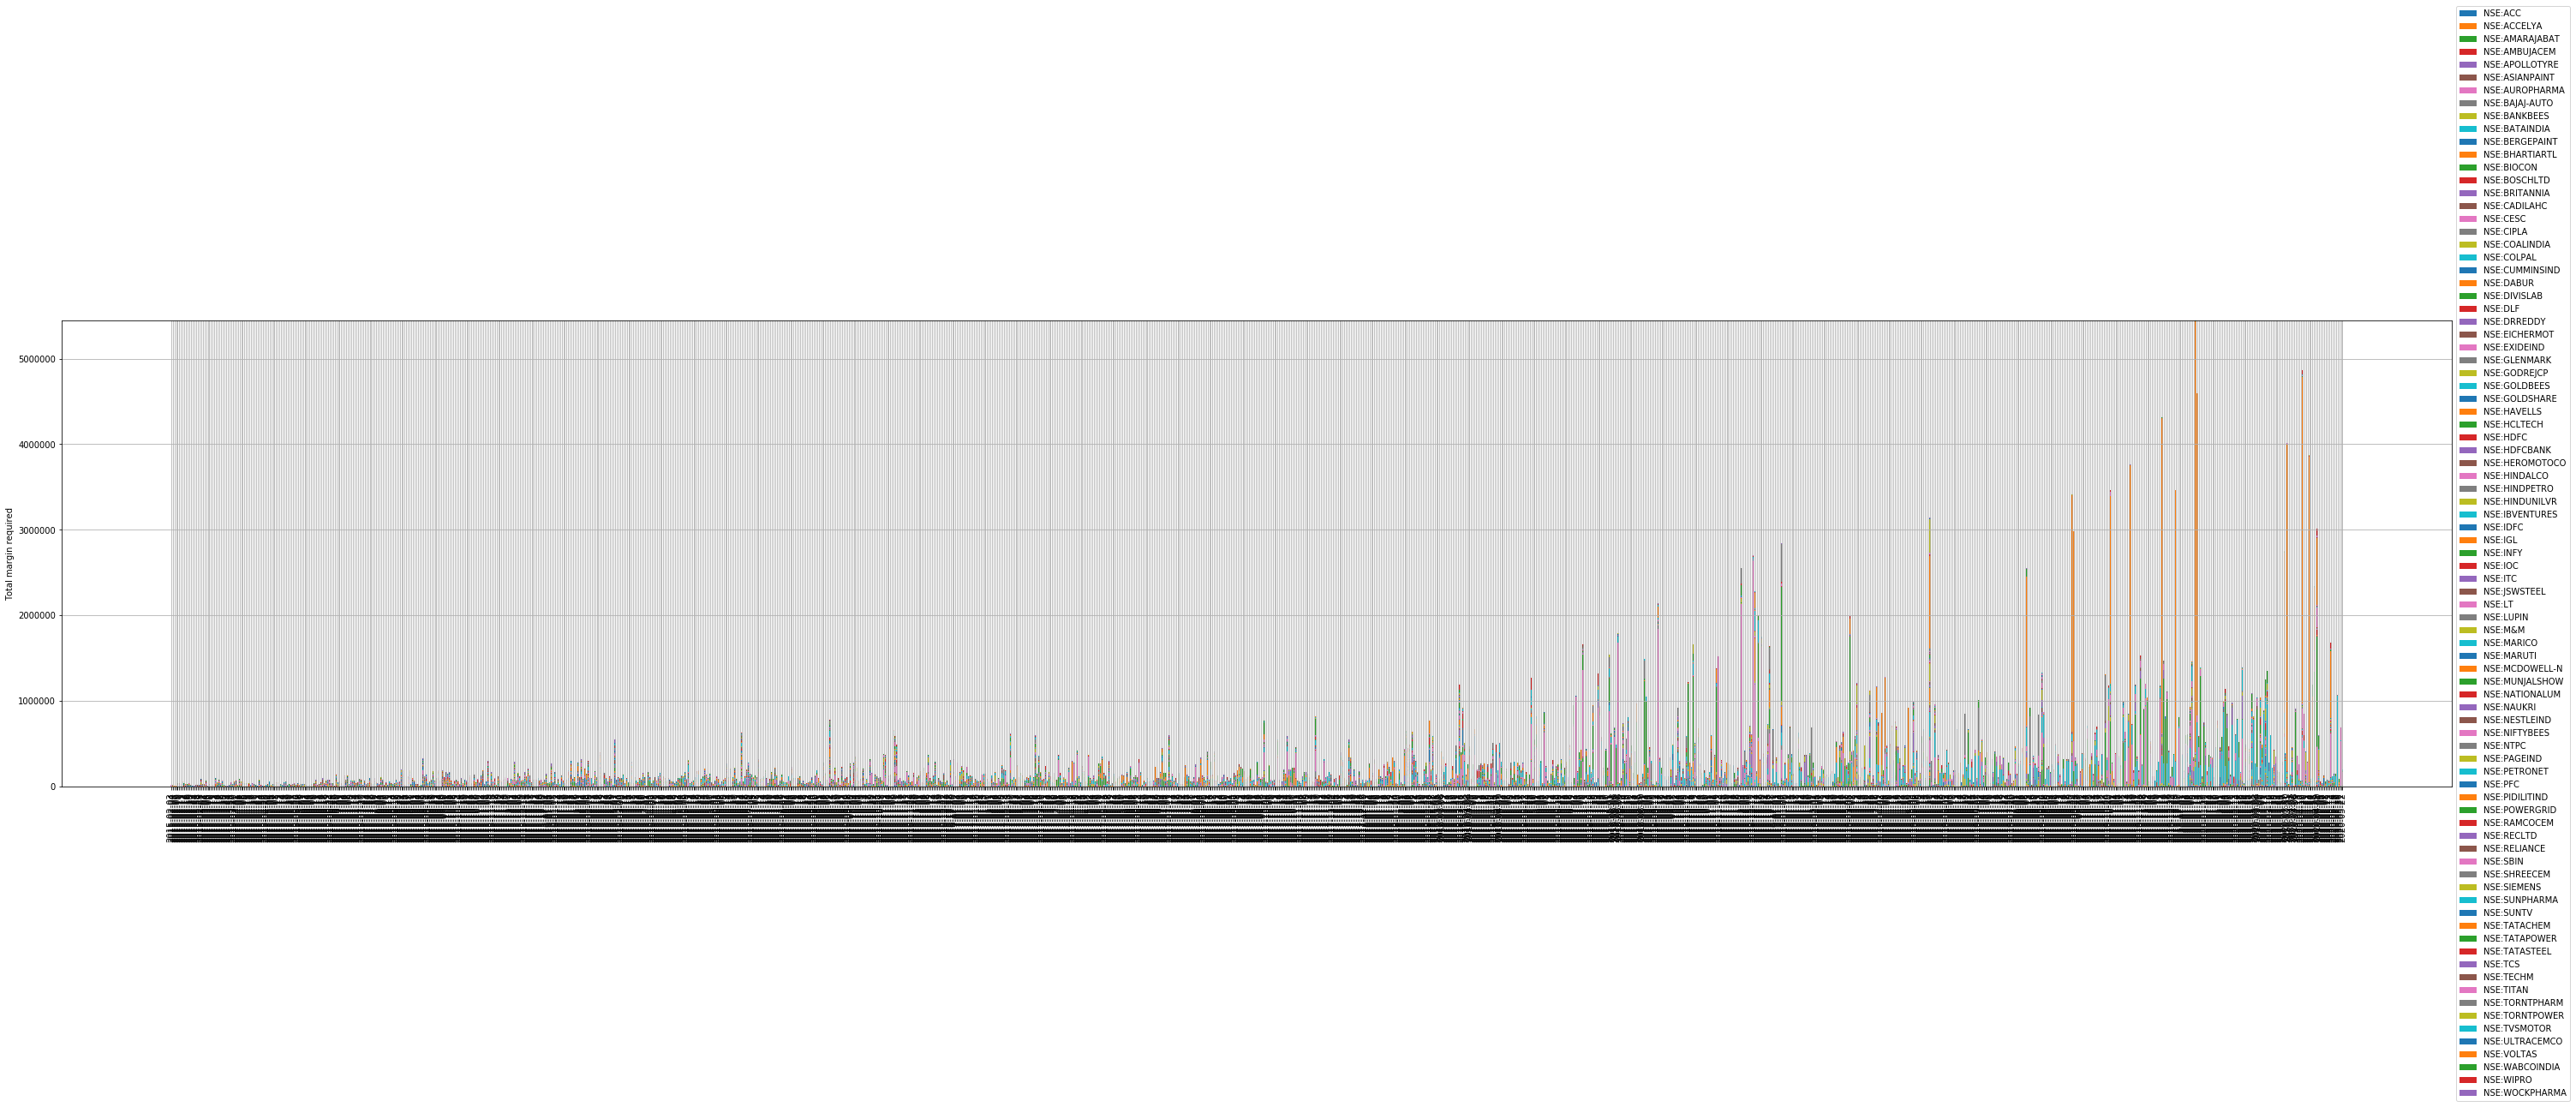

In [31]:
df2 = all_trades.groupby(['date', 'instrument'])['margin_required'].sum().unstack('instrument').fillna(0)

df = df2.transpose()

plt.figure(figsize=(50, 10))

series_labels = df.index.tolist()

data = df.values

category_labels = df.columns.tolist()

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=False,
    value_format="{:.1f}",
    y_label="Total margin required"
)

plt.savefig('margin_required_brokerage_return_newdata_{}_{}.png'.format(begin, end))
plt.show()

## Brokerage Calculation

In [ ]:
# brokerage = min(40, 0.0002 * budget_required)
# stt = 0.00025 * budget_required
# transaction_charges = 2 * 0.0000325 * budget_required
# gst = 0.18 * (brokerage + transaction_charges)
# sebi = 2 * 10 * budget_required/10000000
# total_tax_and_charges = brokerage + stt + transaction_charges + gst + sebi

# profit = profit - total_tax_and_charges

# Postmartem

In [ ]:
all_trades.instrument.nunique()

In [ ]:
set(budget_df.instrument.unique().tolist())-set(all_trades.instrument.unique().tolist())

In [ ]:
all_trades[all_trades['open_today']>120].instrument.nunique()

In [14]:
less_100 = all_trades[all_trades['low_prev']<100].instrument.unique().tolist()

In [ ]:
len(less_100)

In [ ]:
low_trades[low_trades['budget_required']==low_trades.budget_required.max()]

In [ ]:
d = low_trades[low_trades['instrument']=='NSE:TATAMOTORS']

In [ ]:
d

In [ ]:
df_U = get_clean_data('NSE:TATAMOTORS', 2015, 2018)

In [ ]:
df_U.head()

In [ ]:
df_U[(df_U['timestamp']>'2015-02-28 13:40:00+05:30') & (df_U['timestamp']<'2015-02-28 13:59:00+05:30')]